# Principal Component Analysis

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

### Generate the Sample Data

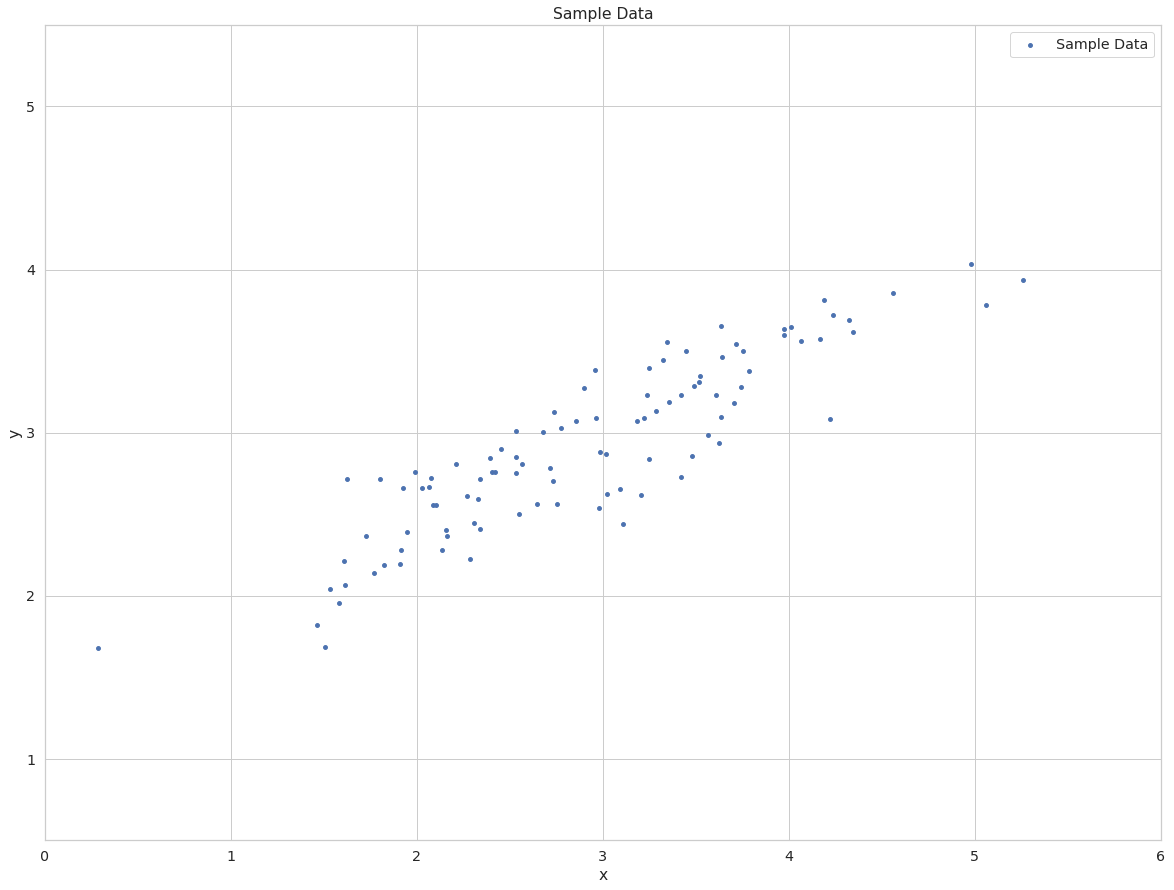

In [2]:
n_samples = 100
d = pd.DataFrame(pd.DataFrame(np.random.multivariate_normal([3, 3], [[1.0, 0.5], [0.5, 0.3]], n_samples)))
d.columns = ['x', 'y']

_ = plt.figure(figsize=fsize)
_ = plt.scatter(d.x, d.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.xlim((0, 6))
_ = plt.ylim((0.5, 5.5))
_ = plt.title('Sample Data')
_ = plt.legend(loc='upper right')

### Manual PCA

In [3]:
cov_matrix = np.cov(d.T.values)
cov_matrix

array([[0.82897088, 0.42800454],
       [0.42800454, 0.27667299]])

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues[:])
print(eigenvectors[:, :])

[1.06218047 0.04346339]
[[ 0.87810888 -0.47846086]
 [ 0.47846086  0.87810888]]


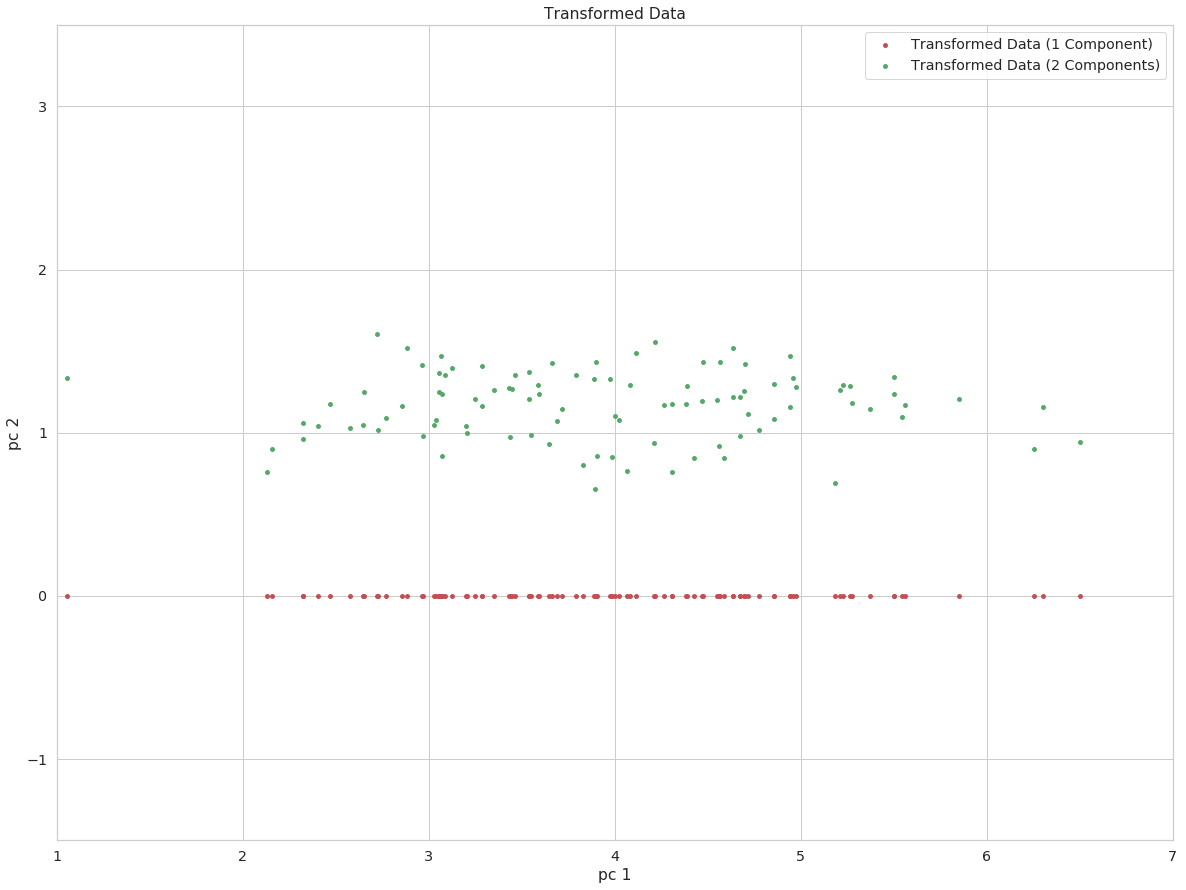

In [5]:
d_pca = pd.DataFrame({
    'pc_1': d.apply(lambda v: np.dot(eigenvectors[:, 0], v), axis=1),
    'pc_2': d.apply(lambda v: np.dot(eigenvectors[:, 1], v), axis=1)
})

_ = plt.figure(figsize=fsize)
_ = plt.scatter(d_pca.pc_1, [0] * len(d_pca), color='r', marker='o', s=dotsize, label='Transformed Data (1 Component)')
_ = plt.scatter(d_pca.pc_1, d_pca.pc_2, color='g', marker='o', s=dotsize, label='Transformed Data (2 Components)')
_ = plt.xlabel('pc 1')
_ = plt.ylabel('pc 2')
_ = plt.xlim((1, 7))
_ = plt.ylim((-1.5, 3.5))
_ = plt.title('Transformed Data')
_ = plt.legend(loc='upper right')

### PCA with SKLearn

[1.06218047 0.04346339]
[[-0.87810888 -0.47846086]
 [ 0.47846086 -0.87810888]]


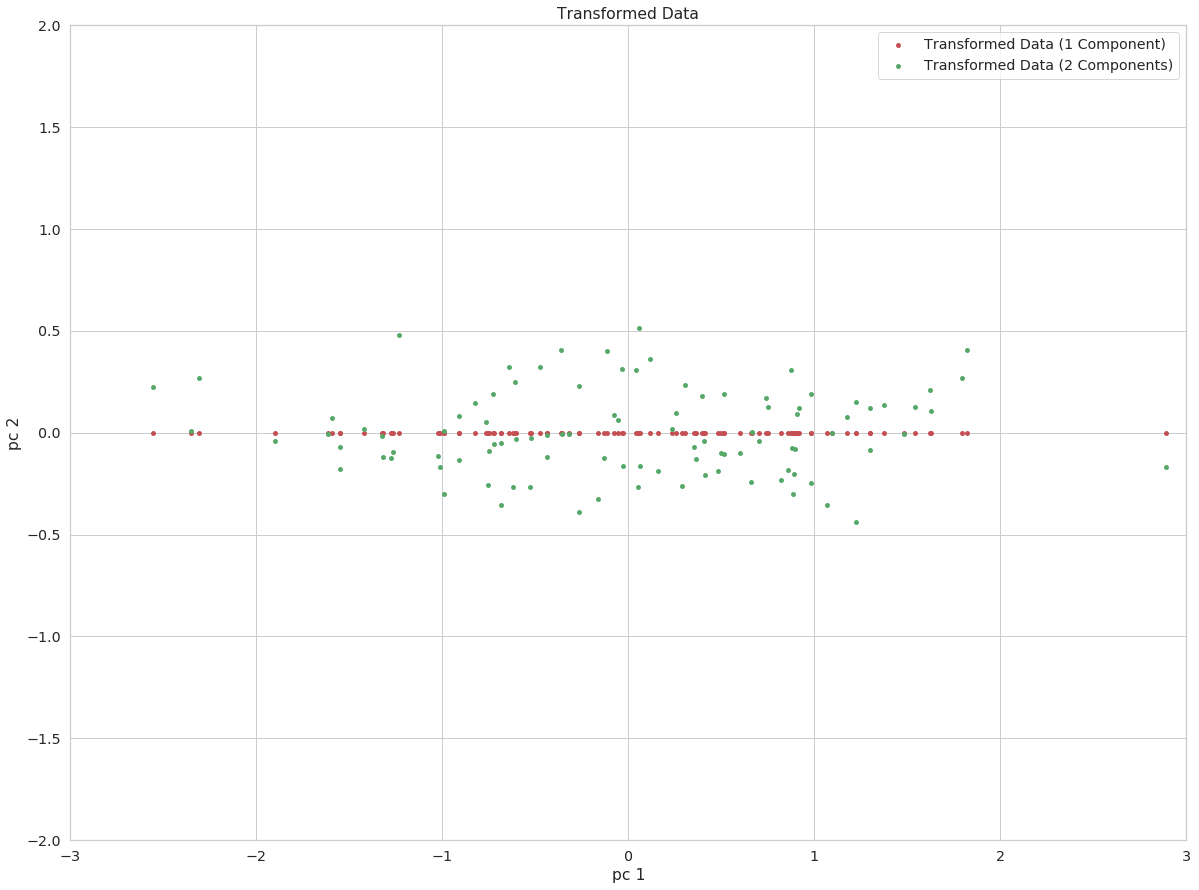

In [6]:
pca = sklearn.decomposition.PCA(2)
pca.fit(d)
d_pca2 = pd.DataFrame(pca.transform(d))
d_pca2.columns = ['pc_1', 'pc_2']

print(pca.explained_variance_)
print(pca.components_)

_ = plt.figure(figsize=fsize)
_ = plt.scatter(d_pca2.pc_1, [0] * len(d_pca2), color='r', marker='o', s=dotsize, label='Transformed Data (1 Component)')
_ = plt.scatter(d_pca2.pc_1, d_pca2.pc_2, color='g', marker='o', s=dotsize, label='Transformed Data (2 Components)')
_ = plt.xlabel('pc 1')
_ = plt.ylabel('pc 2')
_ = plt.xlim((-3, 3))
_ = plt.ylim((-2, 2))
_ = plt.title('Transformed Data')
_ = plt.legend(loc='upper right')